**ASSIGNMENT-3**

In [ ]:
#!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# **1.) Data Augmentation**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/animals',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 5437 images belonging to 91 classes.


In [ ]:
x_test =  test_datagen.flow_from_directory('/content/drive/MyDrive/animals',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 5437 images belonging to 91 classes.


In [ ]:
x_train.class_indices

# **2.) CNN-Convolutional Neural Network**

**A. Input layer**

In [ ]:
model=Sequential()

**B. Minimum 1 Convolution & 1 Pooling layer**

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

**C. 1 Flatten layer**

In [ ]:
model.add(Flatten())

**D. Minimum of 2 Hidden layers**


In [ ]:
#hidden layer-1
model.add(Dense(300,activation='relu'))
#hidden layer-2
model.add(Dense(150,activation='relu'))

**E. Output layer**

In [ ]:
model.add(Dense(91,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=2,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/2
55/55 [==============================] - 796s 14s/step - loss: 4.5206 - accuracy: 0.0090 - val_loss: 4.5181 - val_accuracy: 0.0110
Epoch 2/2
55/55 [==============================] - 282s 5s/step - loss: 4.5173 - accuracy: 0.0092 - val_loss: 4.5153 - val_accuracy: 0.0110


In [ ]:
model.save('animal.h5')

# **3.) Test the Model**

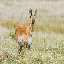

In [50]:
model=load_model('animal.h5')
img=image.load_img(r'/content/drive/MyDrive/animals/antelope/02f4b3be2d.jpg',target_size=(64,64))
img

In [51]:
x=image.img_to_array(img)
x

array([[[188., 180., 159.],
        [200., 193., 174.],
        [194., 189., 160.],
        ...,
        [206., 198., 177.],
        [208., 199., 182.],
        [200., 187., 168.]],

       [[198., 192., 166.],
        [199., 194., 174.],
        [189., 185., 156.],
        ...,
        [216., 207., 192.],
        [210., 201., 184.],
        [210., 204., 190.]],

       [[192., 192., 166.],
        [199., 195., 170.],
        [211., 195., 169.],
        ...,
        [214., 208., 192.],
        [205., 200., 181.],
        [212., 207., 188.]],

       ...,

       [[ 68.,  48.,  21.],
        [168., 165., 130.],
        [198., 185., 153.],
        ...,
        [171., 168., 117.],
        [199., 192., 140.],
        [171., 171., 121.]],

       [[182., 166., 133.],
        [144., 146., 109.],
        [142., 141.,  87.],
        ...,
        [164., 165.,  95.],
        [184., 176., 127.],
        [190., 183., 131.]],

       [[145., 130.,  89.],
        [143., 159., 112.],
        [162., 1

In [52]:
x.ndim

3

In [53]:
x=np.expand_dims(x,axis=0)
x

array([[[[188., 180., 159.],
         [200., 193., 174.],
         [194., 189., 160.],
         ...,
         [206., 198., 177.],
         [208., 199., 182.],
         [200., 187., 168.]],

        [[198., 192., 166.],
         [199., 194., 174.],
         [189., 185., 156.],
         ...,
         [216., 207., 192.],
         [210., 201., 184.],
         [210., 204., 190.]],

        [[192., 192., 166.],
         [199., 195., 170.],
         [211., 195., 169.],
         ...,
         [214., 208., 192.],
         [205., 200., 181.],
         [212., 207., 188.]],

        ...,

        [[ 68.,  48.,  21.],
         [168., 165., 130.],
         [198., 185., 153.],
         ...,
         [171., 168., 117.],
         [199., 192., 140.],
         [171., 171., 121.]],

        [[182., 166., 133.],
         [144., 146., 109.],
         [142., 141.,  87.],
         ...,
         [164., 165.,  95.],
         [184., 176., 127.],
         [190., 183., 131.]],

        [[145., 130.,  89.],
       

In [54]:
x.ndim

4

In [75]:
#pred=model.predict_classes(x)

In [76]:
#pred=np.argmax(model.predict(x),axis=1)
pred

array([43])

In [78]:
index=['koala','badger','bat','bear','bee','beetle','bison','boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose','gorilla','grasshopper','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird','hyena','jellyfish','kangaroo','antelope','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','octopus','okapi']
print(index[pred[0]])

antelope
